# Predict Car Purchase Price

Lets use historical car purchase price to predict the price using an artificial nueral network (ANN).

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [3]:
import tensorflow.keras

In [4]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from jupyterthemes import jtplot
jtplot.style(theme='onedork')

In [7]:
import pathlib

In [8]:
fname_data = 'Car_Purchasing_Data.csv'
data = pd.read_csv(fname_data, encoding='ISO-8859-1')

In [9]:
data.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


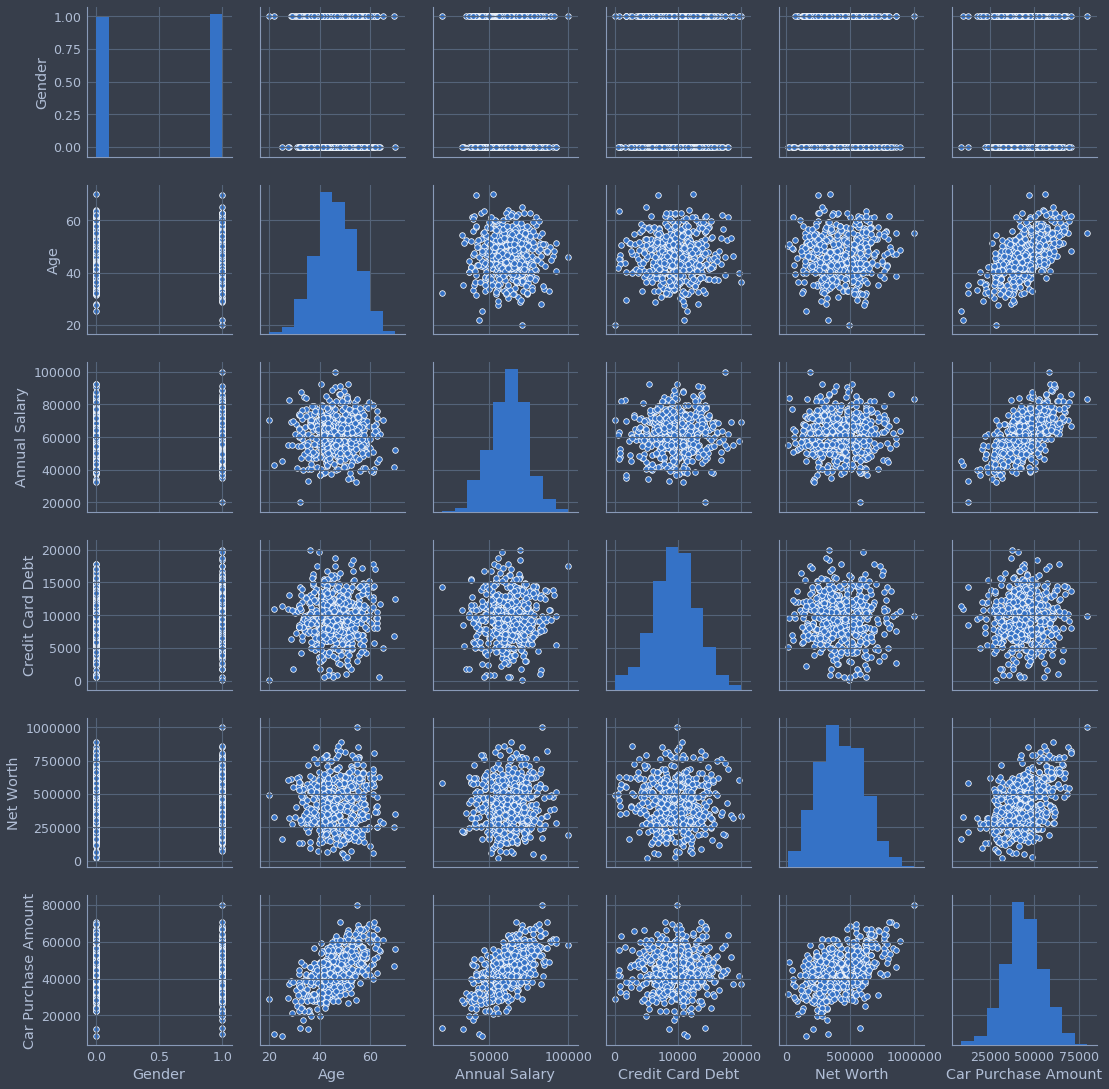

In [10]:
sns.pairplot(data)

A few expected trends stick out.  We see that the purchase price goes up as a function of age, annual salary, and net worth.  It is somewhat surprising that none of those factors seems to be correlated with each other though.

## Data Preparation
Lets remove entries we don't care about then split this data into a training and test groups.  For now lets just look at only the numerical entries, dropping Customer Name, Customer e-mail, and Country.

In [11]:
X = data.drop([
    'Customer Name', 
    'Customer e-mail', 
    'Country', 
    'Car Purchase Amount'
], axis=1)

y = data['Car Purchase Amount']

In [12]:
X.head()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671


In [13]:
y.head()

0    35321.45877
1    45115.52566
2    42925.70921
3    67422.36313
4    55915.46248
Name: Car Purchase Amount, dtype: float64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Normalize the data to have mean of zero and std of one

In [15]:
X_scaler = preprocessing.StandardScaler().fit(X_train)
Xt_scaled = X_scaler.transform(X_train)

In [16]:
Xt_scaled

array([[ 0.94440028,  1.3746169 ,  0.54427991,  1.34508172, -0.02412768],
       [ 0.94440028, -0.35247097,  0.60047853, -0.97170588, -0.60256944],
       [-1.05887304,  1.18057678,  0.73462805,  0.19972573,  2.37007493],
       ...,
       [-1.05887304, -0.06764028,  0.13329717, -1.62903301,  0.98624522],
       [ 0.94440028,  1.51853019, -1.71006067, -0.35357927, -0.06445825],
       [ 0.94440028, -1.92241006,  0.52674907, -0.59651941, -0.15935139]])

In [22]:
y_scaler = preprocessing.StandardScaler().fit(y_train[:, np.newaxis])
yt_scaled = y_scaler.transform(y_train[:, np.newaxis])

In [23]:
Xt_scaled.shape, yt_scaled.shape

((350, 5), (350, 1))

## Define the Neural Network

Our input layer should take our five inputs.  Lets then use a fully-connected or dense network with two hidden layers that each have 25 nodes.  For these layers we will use the [ReLU](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/) activation function (y = x for y > 0 else 0). We have one output, the price, and we want to use a linear activation function (though we don't expect negative values, we don't want to crop them to zero).

In [24]:
model40 = Sequential()
model40.add(Dense(40, input_dim=5, activation='relu'))
model40.add(Dense(40, activation='relu'))
model40.add(Dense(1, activation='linear'))

model40.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 40)                240       
_________________________________________________________________
dense_5 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 41        
Total params: 1,921
Trainable params: 1,921
Non-trainable params: 0
_________________________________________________________________


## Now Train the Model

The model with 15 nodes does not do as well as the one with 40 nodes.  It would be good to find a discussion about developing an intuition for sizing the model.

In [25]:
model40.compile(optimizer='adam', loss='mean_squared_error')

In [26]:
epochs_hist = model40.fit(
    Xt_scaled, yt_scaled, 
    epochs=100, batch_size=25, 
    verbose=1, validation_split=0.2,  # avoid over-fitting
 )

Train on 280 samples, validate on 70 samples
Epoch 1/100
280/280 [==============================] - 1s 5ms/step - loss: 1.0043 - val_loss: 0.7089
Epoch 2/100
280/280 [==============================] - 0s 548us/step - loss: 0.6658 - val_loss: 0.4684
Epoch 3/100
280/280 [==============================] - 0s 312us/step - loss: 0.4343 - val_loss: 0.2858
Epoch 4/100
280/280 [==============================] - 0s 356us/step - loss: 0.2530 - val_loss: 0.1728
Epoch 5/100
280/280 [==============================] - 0s 210us/step - loss: 0.1497 - val_loss: 0.1040
Epoch 6/100
280/280 [==============================] - 0s 360us/step - loss: 0.0879 - val_loss: 0.0705
Epoch 7/100
280/280 [==============================] - 0s 394us/step - loss: 0.0590 - val_loss: 0.0535
Epoch 8/100
280/280 [==============================] - 0s 380us/step - loss: 0.0445 - val_loss: 0.0444
Epoch 9/100
280/280 [==============================] - 0s 380us/step - loss: 0.0345 - val_loss: 0.0347
Epoch 10/100
280/280 [========

280/280 [==============================] - 0s 387us/step - loss: 6.5089e-04 - val_loss: 0.0030
Epoch 79/100
280/280 [==============================] - 0s 331us/step - loss: 6.5950e-04 - val_loss: 0.0032
Epoch 80/100
280/280 [==============================] - 0s 396us/step - loss: 6.2983e-04 - val_loss: 0.0031
Epoch 81/100
280/280 [==============================] - 0s 410us/step - loss: 6.5189e-04 - val_loss: 0.0030
Epoch 82/100
280/280 [==============================] - 0s 574us/step - loss: 5.8723e-04 - val_loss: 0.0030
Epoch 83/100
280/280 [==============================] - 0s 465us/step - loss: 5.7324e-04 - val_loss: 0.0029
Epoch 84/100
280/280 [==============================] - 0s 365us/step - loss: 5.6953e-04 - val_loss: 0.0030
Epoch 85/100
280/280 [==============================] - 0s 386us/step - loss: 5.4783e-04 - val_loss: 0.0029
Epoch 86/100
280/280 [==============================] - 0s 389us/step - loss: 5.8001e-04 - val_loss: 0.0030
Epoch 87/100
280/280 [===================

More epochs certainly helps reduce the loss function.

Changing the batch size also impacts how long it has to train.

## Evaluate the Model

How has the model been perform as a function of the number of epochs?

In [27]:
epochs_hist.history.keys()

dict_keys(['val_loss', 'loss'])

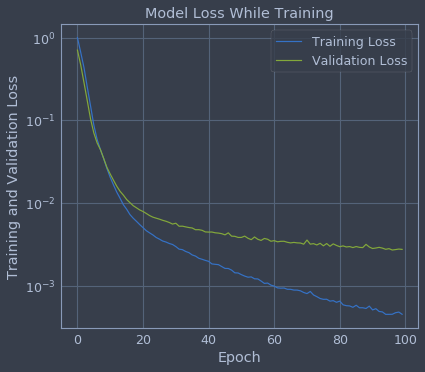

In [28]:
fig, ax = plt.subplots()
ax.plot(epochs_hist.history['loss'])
ax.plot(epochs_hist.history['val_loss'])
ax.set(
    title='Model Loss While Training',
    xlabel='Epoch',
    ylabel='Training and Validation Loss',
)
ax.legend(['Training Loss', 'Validation Loss'])
ax.set_yscale('log')

In [29]:
X.head()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671


## How does this perform on the test data?

In [32]:
test_case = np.array([[1, 35, 125000, 5000, 100000]]) 
test_result = y_scaler.inverse_transform(model40.predict(X_scaler.transform(test_case)))
print(test_result)

[[61580.336]]


In [33]:
test_case = np.array([[1, 50, 50000, 10000, 600000]]) 
test_result = y_scaler.inverse_transform(model40.predict(X_scaler.transform(test_case)))
print(test_result)

[[45737.46]]


In [34]:
test_predictions = y_scaler.inverse_transform(
    model40.predict(
        X_scaler.transform(
            X_test
        )
    )
)

In [35]:
test_predictions

array([[46118.734],
       [44336.6  ],
       [62667.848],
       [31706.932],
       [60830.266],
       [62667.52 ],
       [52303.312],
       [54923.64 ],
       [52106.85 ],
       [47882.625],
       [38732.43 ],
       [55599.914],
       [45379.773],
       [39652.08 ],
       [39751.92 ],
       [54545.492],
       [48696.656],
       [17384.623],
       [60891.04 ],
       [50336.844],
       [41422.223],
       [52758.723],
       [51684.117],
       [38577.37 ],
       [42298.598],
       [38274.008],
       [64028.39 ],
       [48216.363],
       [22514.13 ],
       [52566.355],
       [55968.523],
       [46365.137],
       [40110.12 ],
       [57453.61 ],
       [43667.508],
       [39906.645],
       [62047.508],
       [30625.518],
       [42342.3  ],
       [40776.6  ],
       [57182.867],
       [60776.484],
       [47643.457],
       [36773.355],
       [53550.95 ],
       [44441.49 ],
       [35390.582],
       [41600.79 ],
       [51844.754],
       [47061.84 ],


In [38]:
y_test.shape

(150,)

In [40]:
test_predictions.shape

(150, 1)

In [41]:
difference = y_test - test_predictions[:,0]

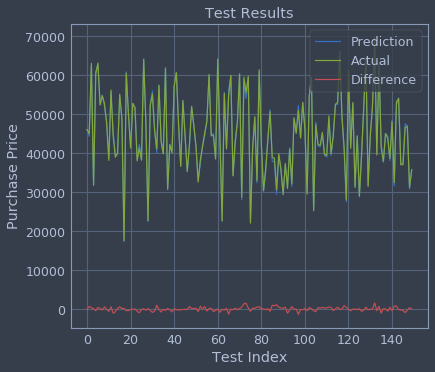

In [47]:
fig, ax = plt.subplots()
ax.plot(test_predictions)
ax.plot(y_test.values)
ax.plot(difference.values)
ax.set(
    title='Test Results',
    xlabel='Test Index',
    ylabel='Purchase Price',
)
ax.legend(['Prediction', 'Actual', 'Difference'])
# ax.set_yscale('log')

In [49]:
difference.describe()

count     150.000000
mean       55.260152
std       515.088593
min     -1314.020413
25%      -231.528481
50%        29.633353
75%       315.581434
max      1635.677145
Name: Car Purchase Amount, dtype: float64

This seems almost too good to be true.  The difference values were incredibly small.